In [2]:
import os
import pandas as pd 

In [3]:
os.listdir("./subway")

['Subway_201610.csv',
 'Subway_201604.csv',
 'Subway_201605.csv',
 'Subway_201611.csv',
 'Subway_201607.csv',
 'Subway_201612.csv',
 'Subway_201606.csv',
 'Subway_201602.csv',
 'Subway_201603.csv',
 'Subway_201601.csv',
 'Subway_201608.csv',
 'Subway_201609.csv']

In [4]:
for file in os.listdir("./subway"):
    locals()[f'sub{file.split(".")[0][-2:]}'] = pd.read_csv(f"./subway/{file}", encoding='euc-kr')

In [5]:
df = pd.concat([sub01,sub02,sub03,sub04,sub05])

In [6]:
hosun_table = df.loc[:,['역명','호선']]

In [7]:
hosun_table.drop_duplicates(subset=['역명','호선'],ignore_index=True,inplace=True)

In [8]:
hosun_table.reset_index(inplace=True)

In [9]:
hosun_table

,index,역명,호선
0,0,서울역(150),1호선
1,1,시청(151),1호선
2,2,종각(152),1호선
3,3,종로3가(153),1호선
4,4,종로5가(154),1호선
...,...,...,...
114,114,이촌(430),4호선
115,115,동작(431),4호선
116,116,총신대입구(432),4호선
117,117,사당(433),4호선


In [10]:
# hosun_table[hosun_table['역명'] == '이촌(430)']['호선'].values[0]
sub06['호선'] = sub06['역명'].apply(lambda x : hosun_table[hosun_table['역명'] == x]['호선'].values[0])

In [11]:
df.columns = df.columns.str.replace(" ","")

In [12]:
df.columns

Index(['날짜', '호선', '역명', '구분', '할인', '04~05', '05~06', '06~07', '07~08',
       '08~09', '09~10', '10~11', '11~12', '12~13', '13~14', '14~15', '15~16',
       '16~17', '17~18', '18~19', '19~20', '20~21', '21~22', '22~23', '23~24',
       '00~01', '01~02', '02~03', '03~04'],
      dtype='object')

In [13]:
df.drop("할인",axis=1,inplace=True)

In [14]:
df.columns

Index(['날짜', '호선', '역명', '구분', '04~05', '05~06', '06~07', '07~08', '08~09',
       '09~10', '10~11', '11~12', '12~13', '13~14', '14~15', '15~16', '16~17',
       '17~18', '18~19', '19~20', '20~21', '21~22', '22~23', '23~24', '00~01',
       '01~02', '02~03', '03~04'],
      dtype='object')

In [15]:
df = pd.concat([df,sub06])

In [16]:
df.fillna(0,inplace=True)
df = df.astype({'04~05':'int','02~03':'int','03~04':'int'})

In [17]:
sub07.columns

Index(['역명', '날짜', '구분', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
       '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24', '00~01', '01~02'],
      dtype='object')

In [18]:
df = pd.concat([df,sub07,sub08,sub09,sub10,sub11])

In [19]:
sub12.columns = sub12.columns.str.replace("시","")

In [20]:
df = pd.concat([df,sub12])

In [21]:
# hosun_table[hosun_table['역명'] == '이촌(430)']['호선'].values[0]
df['호선'] = df['역명'].apply(lambda x : hosun_table[hosun_table['역명'] == x]['호선'].values[0])

In [22]:
df.fillna(0,inplace=True)
df = df.astype({'04~05':'int','02~03':'int','03~04':'int'})

In [23]:
df.head()

,날짜,호선,역명,구분,04~05,05~06,06~07,07~08,08~09,09~10,...,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02,02~03,03~04
0,2016-01-01,1호선,서울역(150),승차,44,298,243,490,909,1347,...,2520,2129,1924,2038,1766,868,52,0,0,0
1,2016-01-01,1호선,서울역(150),승차,1,4,0,4,18,60,...,70,38,37,45,32,6,0,0,0,0
2,2016-01-01,1호선,서울역(150),승차,8,33,15,16,54,89,...,139,106,111,128,89,44,1,0,0,0
3,2016-01-01,1호선,서울역(150),승차,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-01,1호선,서울역(150),승차,11,70,78,65,151,207,...,284,219,168,138,138,50,4,0,0,0


In [24]:
df['역명'] = df['역명'].apply(lambda x: x.split("(")[0])

In [25]:
df2 = df

In [26]:
df = df2.reset_index(drop=True)

In [27]:
df

,날짜,호선,역명,구분,04~05,05~06,06~07,07~08,08~09,09~10,...,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02,02~03,03~04
0,2016-01-01,1호선,서울역,승차,44,298,243,490,909,1347,...,2520,2129,1924,2038,1766,868,52,0,0,0
1,2016-01-01,1호선,서울역,승차,1,4,0,4,18,60,...,70,38,37,45,32,6,0,0,0,0
2,2016-01-01,1호선,서울역,승차,8,33,15,16,54,89,...,139,106,111,128,89,44,1,0,0,0
3,2016-01-01,1호선,서울역,승차,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-01,1호선,서울역,승차,11,70,78,65,151,207,...,284,219,168,138,138,50,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312361,2016-12-29,4호선,남태령,하차,0,2,26,189,238,68,...,67,78,36,50,39,24,17,0,0,0
312362,2016-12-30,4호선,남태령,승차,0,18,23,125,165,111,...,275,164,41,29,22,10,1,0,0,0
312363,2016-12-30,4호선,남태령,하차,0,4,39,75,154,61,...,81,59,47,30,34,25,14,0,0,0
312364,2016-12-31,4호선,남태령,승차,0,16,22,19,93,81,...,307,36,15,24,10,9,0,0,0,0


In [28]:
df['하루_이용수'] = df.iloc[:,4:].sum(axis=1)

In [29]:
df.head()

,날짜,호선,역명,구분,04~05,05~06,06~07,07~08,08~09,09~10,...,19~20,20~21,21~22,22~23,23~24,00~01,01~02,02~03,03~04,하루_이용수
0,2016-01-01,1호선,서울역,승차,44,298,243,490,909,1347,...,2129,1924,2038,1766,868,52,0,0,0,34389
1,2016-01-01,1호선,서울역,승차,1,4,0,4,18,60,...,38,37,45,32,6,0,0,0,0,1000
2,2016-01-01,1호선,서울역,승차,8,33,15,16,54,89,...,106,111,128,89,44,1,0,0,0,2035
3,2016-01-01,1호선,서울역,승차,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2016-01-01,1호선,서울역,승차,11,70,78,65,151,207,...,219,168,138,138,50,4,0,0,0,4440


In [30]:
temp = df.groupby(['날짜','호선','역명','구분']).sum()

In [31]:
df2 = temp.reset_index()

In [32]:
df2.head()

,날짜,호선,역명,구분,04~05,05~06,06~07,07~08,08~09,09~10,...,19~20,20~21,21~22,22~23,23~24,00~01,01~02,02~03,03~04,하루_이용수
0,2016-01-01,1호선,동대문,승차,6,147,168,170,293,479,...,614,475,414,291,138,6,0,0,0,10529
1,2016-01-01,1호선,동대문,하차,0,31,164,146,164,354,...,827,660,614,471,348,122,0,0,0,13513
2,2016-01-01,1호선,동묘앞,승차,5,37,65,66,110,161,...,198,139,136,81,52,2,0,0,0,7214
3,2016-01-01,1호선,동묘앞,하차,0,19,75,88,147,199,...,165,149,146,176,144,106,0,0,0,7582
4,2016-01-01,1호선,서울역,승차,64,405,339,584,1144,1723,...,2519,2281,2398,2056,996,58,0,0,0,42632


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87108 entries, 0 to 87107
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      87108 non-null  object
 1   호선      87108 non-null  object
 2   역명      87108 non-null  object
 3   구분      87108 non-null  object
 4   04~05   87108 non-null  int64 
 5   05~06   87108 non-null  int64 
 6   06~07   87108 non-null  int64 
 7   07~08   87108 non-null  int64 
 8   08~09   87108 non-null  int64 
 9   09~10   87108 non-null  int64 
 10  10~11   87108 non-null  int64 
 11  11~12   87108 non-null  int64 
 12  12~13   87108 non-null  int64 
 13  13~14   87108 non-null  int64 
 14  14~15   87108 non-null  int64 
 15  15~16   87108 non-null  int64 
 16  16~17   87108 non-null  int64 
 17  17~18   87108 non-null  int64 
 18  18~19   87108 non-null  int64 
 19  19~20   87108 non-null  int64 
 20  20~21   87108 non-null  int64 
 21  21~22   87108 non-null  int64 
 22  22~23   87108 non-null

In [34]:
temp = df2.groupby(["날짜",'호선','역명']).sum()
temp.reset_index(inplace=True)

In [35]:
temp['날짜'] = temp['날짜'].apply(lambda x : x.split("-")[1])

In [36]:
temp.reset_index(inplace=True)

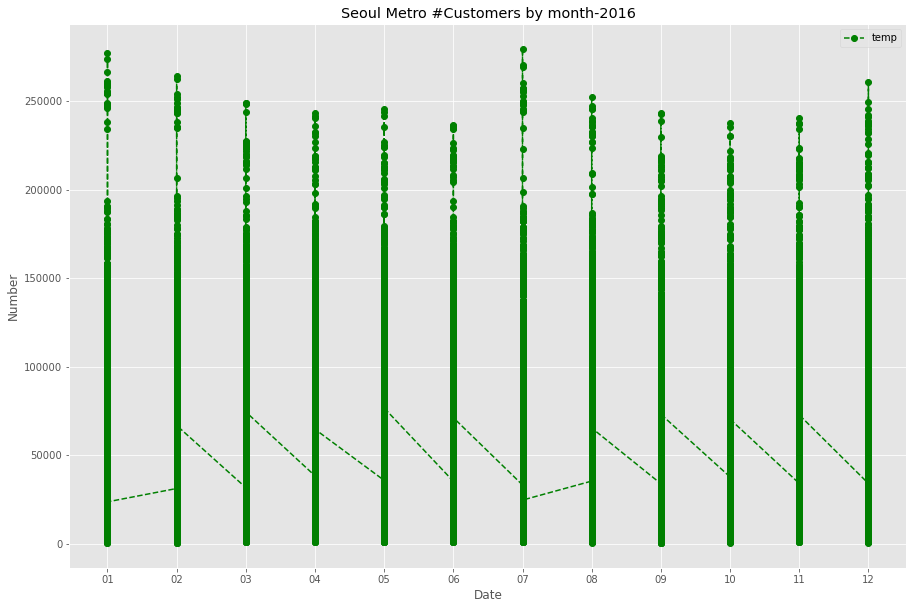

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.style.use("ggplot")
x_value_01 = temp.날짜
y_value_01 = temp.하루_이용수

# 마커를 포함한 빨간선 대쉬 선 그래프를 그리고, label은 'red line'으로 설정  
plt.plot(x_value_01, y_value_01, color='green', marker='o', linestyle='dashed', label='temp')
# X값에 따른 Y값을 나타내는 초록색 막대 그래프를 그리고 label은 'bar plot'으로 설정
plt.xlabel('Date')
plt.ylabel('Number')
# 두개의 그래프에서 label설정된 문자열 값을 범례로 표시
# plt.xticks(ticks=x_value_01, rotation=45)
plt.legend()

plt.title('Seoul Metro #Customers by month-2016')

plt.show()

In [39]:
df2.head()

,날짜,호선,역명,구분,04~05,05~06,06~07,07~08,08~09,09~10,...,19~20,20~21,21~22,22~23,23~24,00~01,01~02,02~03,03~04,하루_이용수
0,2016-01-01,1호선,동대문,승차,6,147,168,170,293,479,...,614,475,414,291,138,6,0,0,0,10529
1,2016-01-01,1호선,동대문,하차,0,31,164,146,164,354,...,827,660,614,471,348,122,0,0,0,13513
2,2016-01-01,1호선,동묘앞,승차,5,37,65,66,110,161,...,198,139,136,81,52,2,0,0,0,7214
3,2016-01-01,1호선,동묘앞,하차,0,19,75,88,147,199,...,165,149,146,176,144,106,0,0,0,7582
4,2016-01-01,1호선,서울역,승차,64,405,339,584,1144,1723,...,2519,2281,2398,2056,996,58,0,0,0,42632


In [40]:
import pickle
data = dict(df2)
with open('subway.pickle', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)